In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [0]:
def zero_pad(X,pad):
  X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  return X_pad

x.shape = (8, 2, 3, 7)
x_pad.shape = (8, 4, 5, 7)
x[1,1] = [[-0.29809284  0.48851815 -0.07557171  1.13162939  1.51981682  2.18557541
  -1.39649634]
 [-1.44411381 -0.50446586  0.16003707  0.87616892  0.31563495 -2.02220122
  -0.30620401]
 [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
   0.41005165]]
x_pad[1,1] = [[ 0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
   0.12015895]
 [ 0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272 -0.20889423
   0.58662319]
 [ 0.83898341  0.93110208  0.28558733  0.88514116 -0.75439794  1.25286816
   0.51292982]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


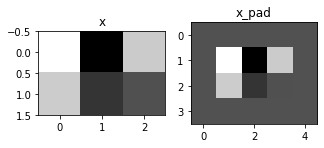

In [3]:
np.random.seed(1)

x = np.random.randn(8, 2, 3, 7) 
x_pad = zero_pad(x, 1) 
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [0]:
def pool_forward(A_prev,hparameters,mode='max'):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    f = hparameters["f"]
    stride = hparameters["stride"]

    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m): 
        for h in range(n_H): 
            for w in range(n_W): 
                for c in range (n_C): 

                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

  
    cache = (A_prev, hparameters)
    
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [5]:
np.random.seed(1)
A_prev=np.random.randn(8, 2, 3, 7)
hparameters={'stride':1,'f':2}
A,cache=pool_forward(A_prev,hparameters)
print('mode=max')
print('A=',A)
print()
A,cache=pool_forward(A_prev,hparameters,mode='average')
print('mode=average')
print('A=',A)

mode=max
A= [[[[ 1.62434536  0.90159072  0.50249434  1.46210794  0.86540763
    -0.12289023  1.74481176]
   [ 1.13376944  0.53035547  0.2344157   1.65980218  0.74204416
     0.58281521 -0.38405435]]]


 [[[ 0.61720311  1.6924546   0.16003707  1.13162939  1.51981682
     2.18557541  0.58662319]
   [ 0.83898341  0.93110208  0.76201118  0.88514116  0.31563495
     1.25286816  0.58662319]]]


 [[[ 0.84616065  0.74055645  0.35054598  0.42349435  0.12182127
     1.12948391  1.19891788]
   [ 0.84616065  0.69803203  0.35054598  1.27375593  1.96710175
     0.59357852  1.23616403]]]


 [[[ 1.62765075  0.79280687  0.68255141  0.86334532  0.01740941
     1.0388246   2.18697965]
   [ 0.5505375   0.79280687  0.86888616  0.75041164  0.52946532
     0.98633519  0.2135339 ]]]


 [[[ 2.19069973  1.33145711  0.81095167  1.90465871  2.52832571
     0.82400562  0.31354772]
   [ 1.95487808  1.33145711  0.81095167  1.04444209  0.5627611
     0.82400562  1.9560789 ]]]


 [[[ 0.20183018  1.40754     1.79215821